<a href="https://colab.research.google.com/github/bsmartabdullah/Adventure/blob/main/Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv')
df


,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3650 non-null   object 
 1   Temp    3650 non-null   float64
dtypes: float64(1), object(1)
memory usage: 57.2+ KB


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Temp'] = df['Temp'].astype(int)
df

In [10]:
df = df.rename(columns={'Date':'ds','Temp':'y'})

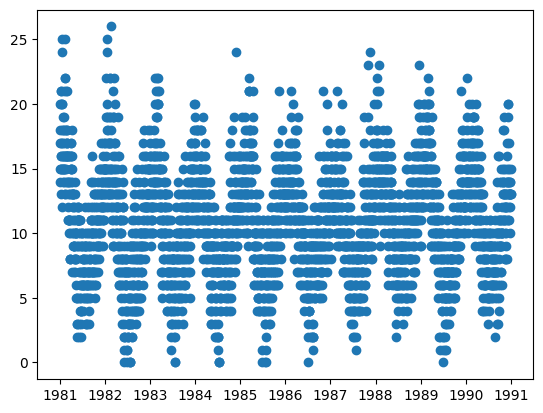

In [11]:
import matplotlib.pyplot as plt
plt.scatter(df['ds'],df['y'])

In [13]:
import prophet
op = prophet.Prophet()
op.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm9c9ck1n/6xcf04ex.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm9c9ck1n/gixl0i6c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37075', 'data', 'file=/tmp/tmpm9c9ck1n/6xcf04ex.json', 'init=/tmp/tmpm9c9ck1n/gixl0i6c.json', 'output', 'file=/tmp/tmpm9c9ck1n/prophet_model8ch0jjgl/prophet_model-20231119200040.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:00:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:00:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [23]:
forecast = op.make_future_dataframe(periods=36,freq =  'M')
forecast =op.predict(forecast)

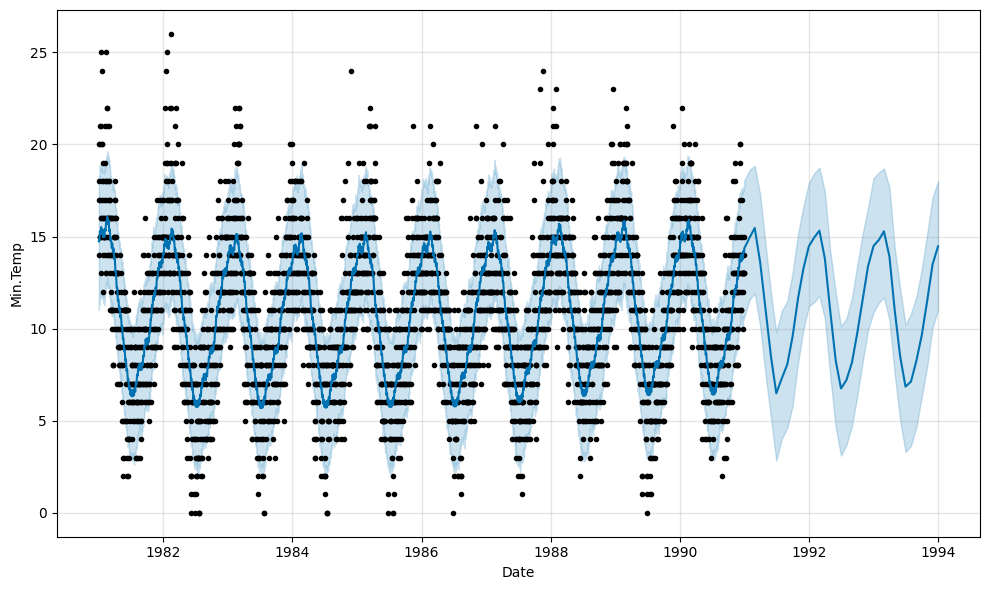

<Figure size 2500x500 with 0 Axes>

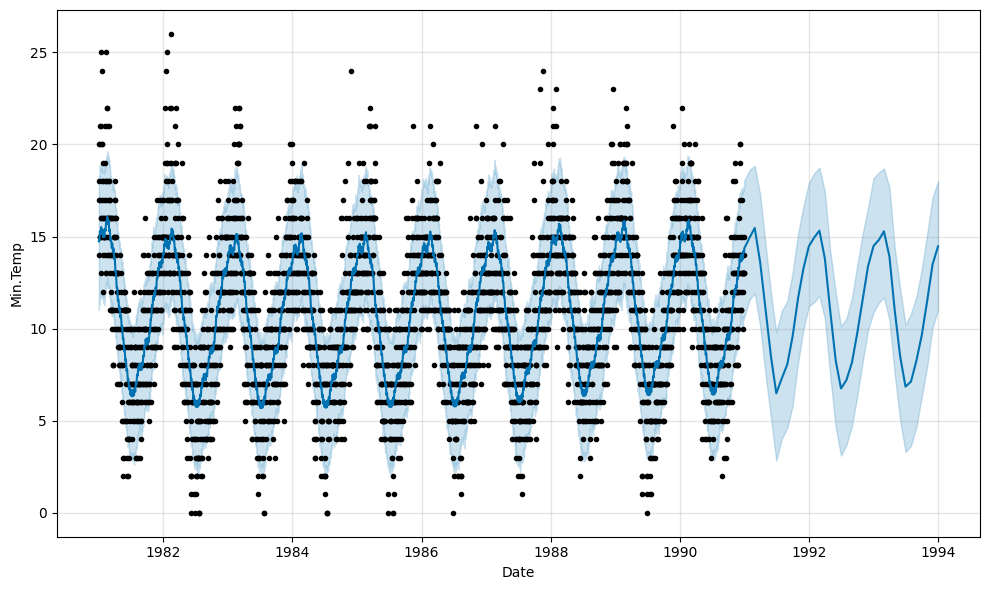

In [24]:
plt.figure(figsize = (25,5))
op.plot(forecast,xlabel='Date',ylabel='Min.Temp')